# Baseline Model based on U-Net - Trained on Azure

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

if 'notebooks' in os.getcwd():
    os.chdir("..")

print(os.getcwd())

/Users/jh/ai/courses/stanford/3-ML_RL/final_project/xcs229ii_final_project/code


### Helper methods

In [3]:
from utils.dataloader import SimpleDataLoader

def load_images(image_dir, backbone=None, load_masks=False, resize_to=None, size=None):
    simple_data_loader = SimpleDataLoader(
        backbone=backbone,
        images_folder_path=os.path.join(image_dir, "images"),
        masks_folder_path=os.path.join(image_dir, "masks"),
        resize_to=resize_to,
        size=size
    )
    
    images = simple_data_loader.get_images()
    masks = None
    
    if load_masks:
        masks = simple_data_loader.get_masks()
        
    return images, masks


Segmentation Models: using `tf.keras` framework.


In [4]:
from utils.helper import Visualisation
import numpy as np

def plot_images_masks(model, images, masks=None):
    for index, image in enumerate(images):
        image = np.expand_dims(image, axis=0)
        print(f"Image shape: {image.shape}")

        predicted_mask = model.predict(image).round()
        print(f"Predicted mask shape: {predicted_mask.shape}")
        
        mask = None
        
        if masks is not None:
            mask = masks[index]
            print(f"Mask shape: {mask.shape}")
        
        if mask is None:
            Visualisation().plot_images(
                image=image.squeeze(),
                predicted_mask=predicted_mask.squeeze(axis=0)
            )
        else:
            Visualisation().plot_images(
                image=image.squeeze(),
                predicted_mask=predicted_mask.squeeze(axis=0),
                mask=mask.squeeze()
            )

## Load Model Weights From Azure Instance

### Experiment 01 - VGG, No-Pretrained Weights

Experiments based on [experiment list](https://docs.google.com/spreadsheets/d/1bsp8puoiK3ay0rUYdjFXcbxXf6iSJZenIWtoiWczlBA/edit#gid=1999600204https://docs.google.com/spreadsheets/d/1bsp8puoiK3ay0rUYdjFXcbxXf6iSJZenIWtoiWczlBA/edit#gid=1999600204).

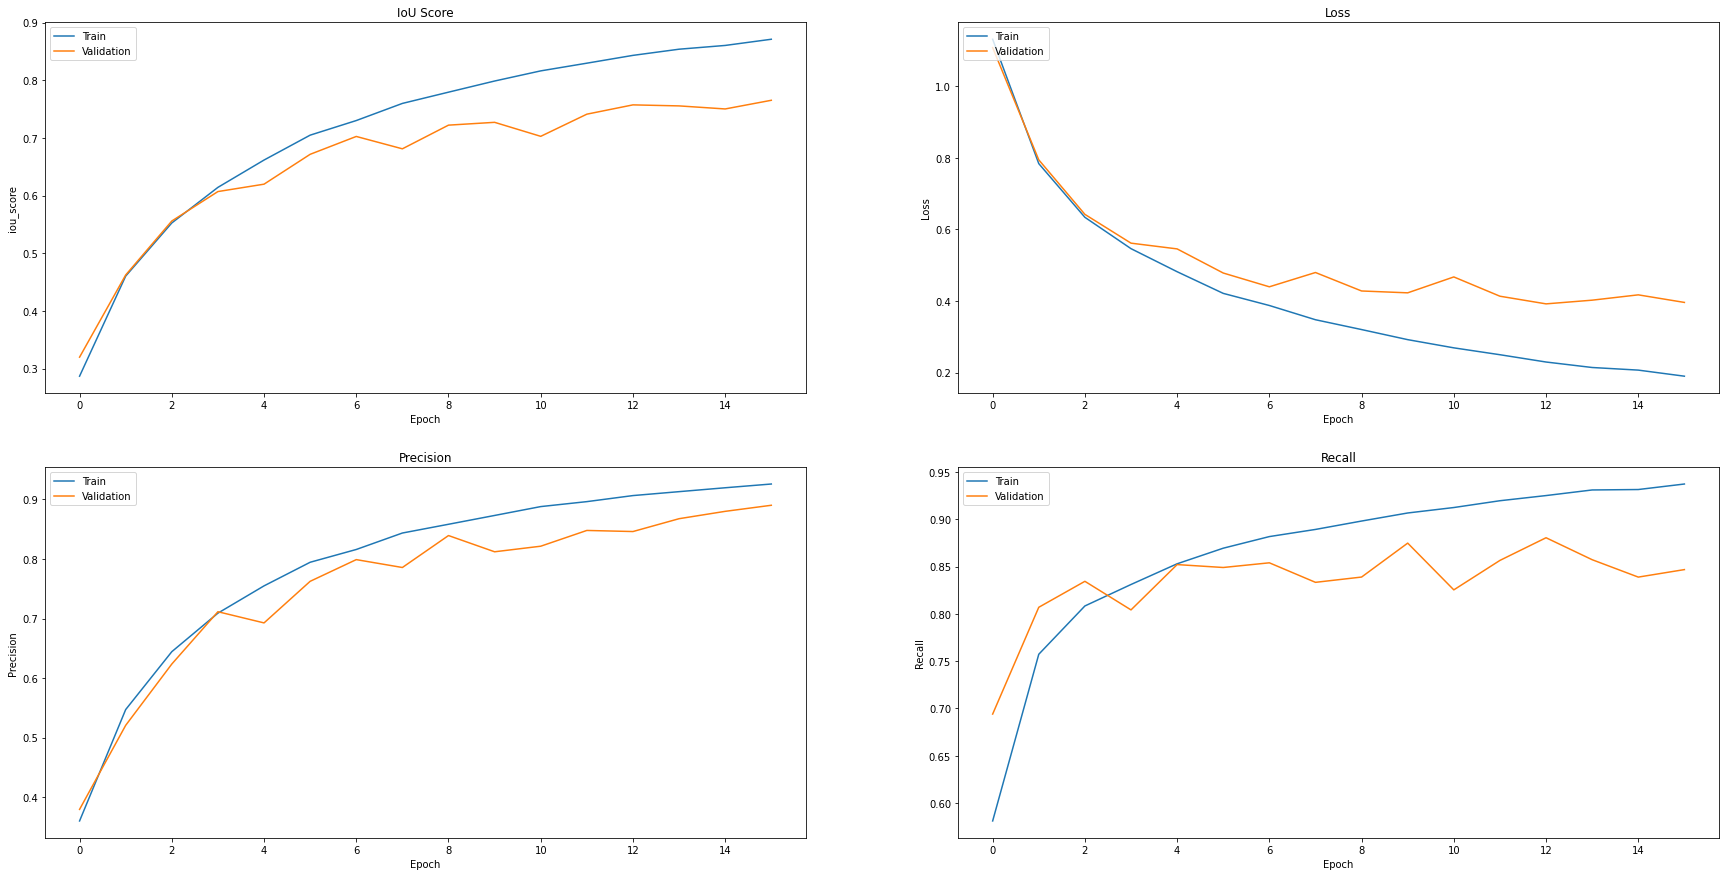

In [5]:
from utils.helper import Visualisation
import pickle
import os
from constants import EXPORT_DIR

AZURE_PATH = os.path.join(EXPORT_DIR, "azure", "2021_05_11_1424", "baseline")

azure_hitory_path = os.path.join(AZURE_PATH, "baseline_01_train_history.pkl")
azure_history = pickle.load(open(azure_hitory_path, "rb"))
Visualisation().plot_curves(azure_history)

In [6]:
import segmentation_models as sm

azure_model = sm.Unet(encoder_weights=None)

#### Train Images

In [7]:
from baseline.trainer import Trainer
import segmentation_models as sm

azure_model = sm.Unet(activation='sigmoid')
azure_model.load_weights(os.path.join(AZURE_PATH, "baseline_01_baseline.h5"))
trainer = Trainer(model=azure_model)

In [8]:
from constants import TRAIN_DIR

train_images, train_masks = load_images(TRAIN_DIR, load_masks=True, resize_to=(256, 256), size=5)

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


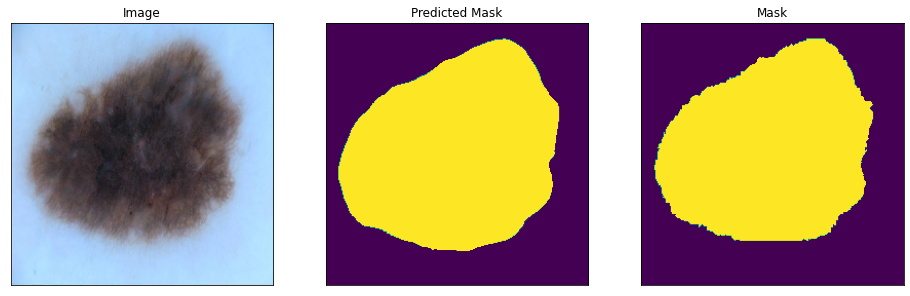

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


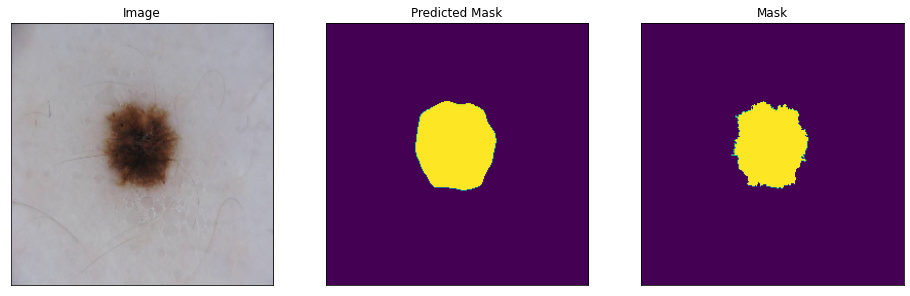

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


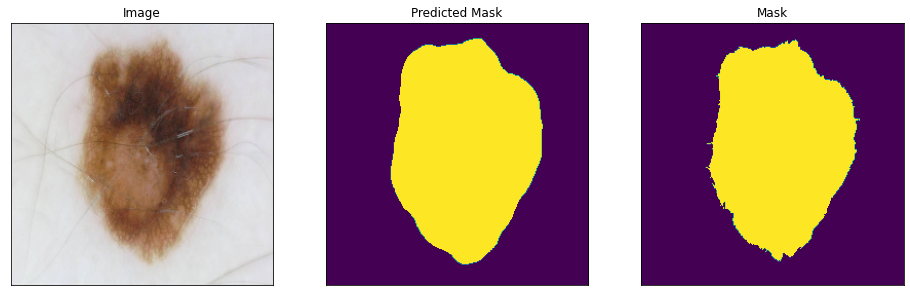

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


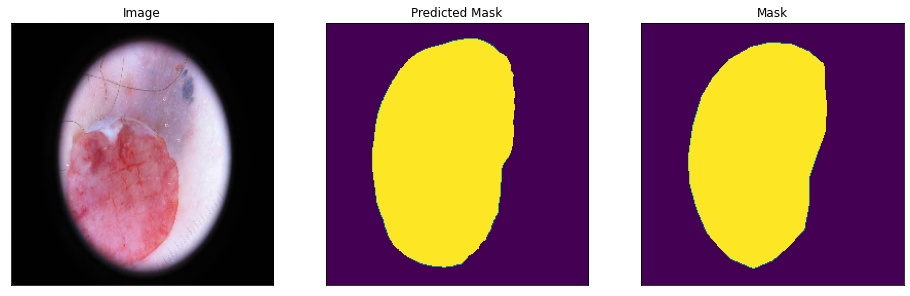

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


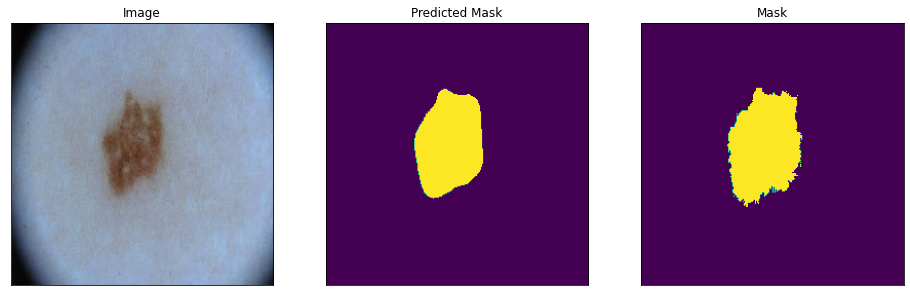

In [9]:
plot_images_masks(azure_model, train_images, train_masks)

#### Validation Images

In [10]:
from constants import VALIDATION_DIR

validation_images, validation_masks = load_images(VALIDATION_DIR, load_masks=True, resize_to=(256, 256), size=5)

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


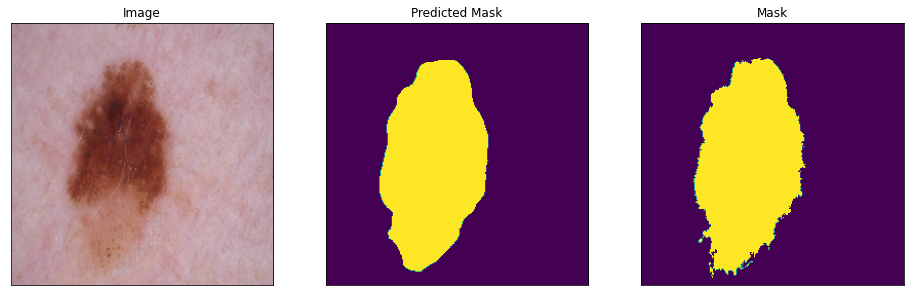

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


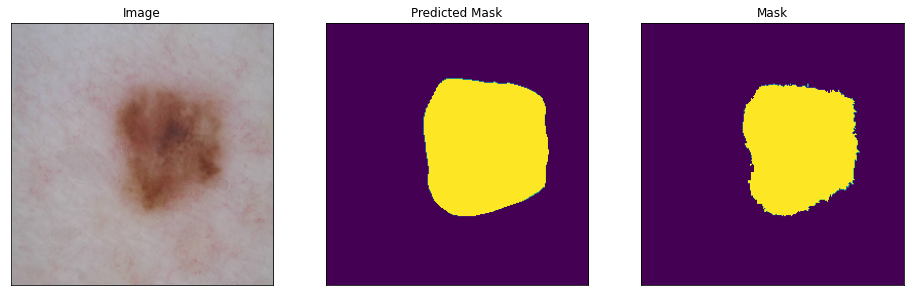

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


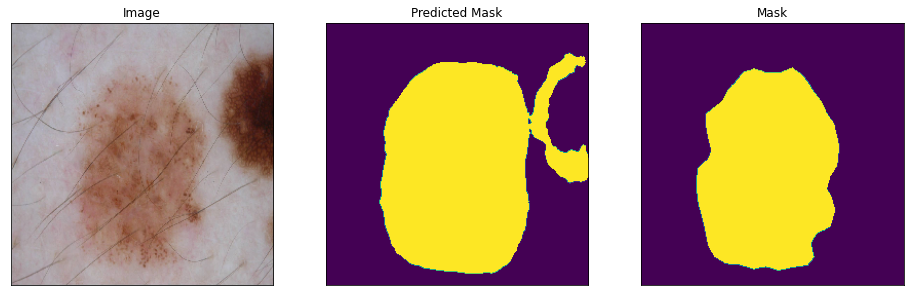

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


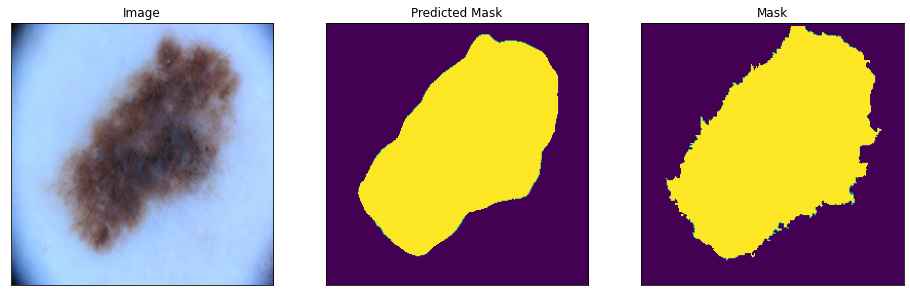

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


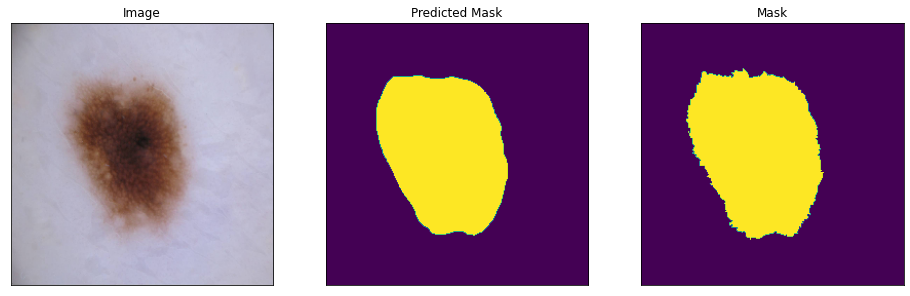

In [11]:
plot_images_masks(azure_model, validation_images, validation_masks)

##### Full Size Images

In [12]:
from constants import VALIDATION_DIR

validation_images, validation_masks = load_images(VALIDATION_DIR, load_masks=True, resize_to=(256, 256), size=5)

(1, 256, 256, 3)
(1, 256, 256, 1)


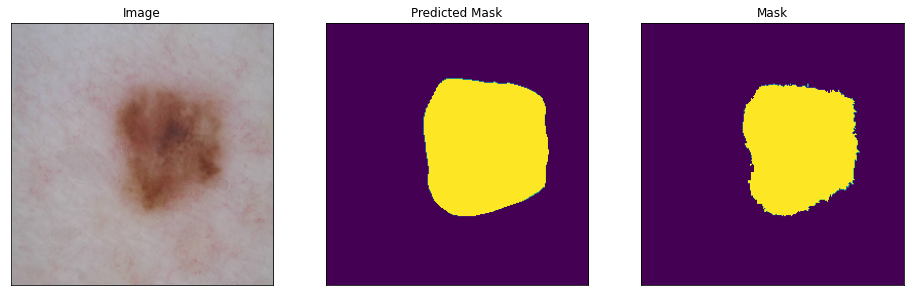

In [13]:
from utils.helper import Visualisation

index = 1

image = validation_images[index]
image = np.expand_dims(image, axis=0)
print(image.shape)

predicted_mask = azure_model.predict(image).round()
print(predicted_mask.shape)

Visualisation().plot_images(
    image=image.squeeze(),
    predicted_mask=predicted_mask.squeeze(axis=0),
    mask=validation_masks[index].squeeze()
)

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


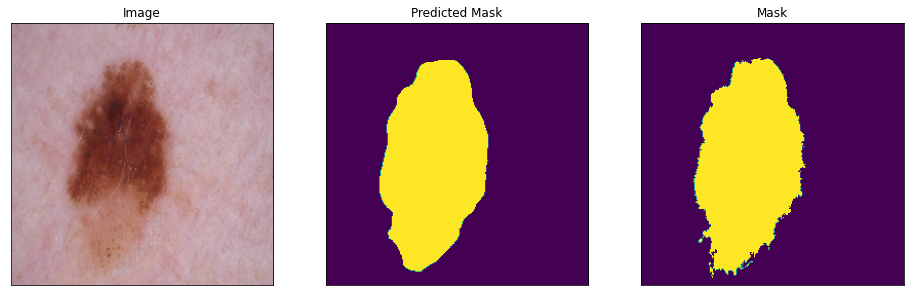

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


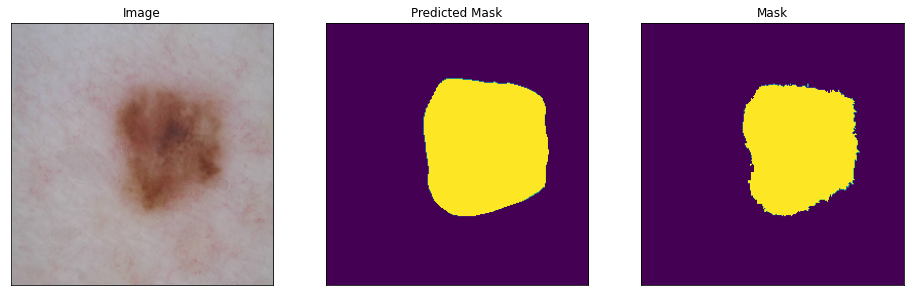

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


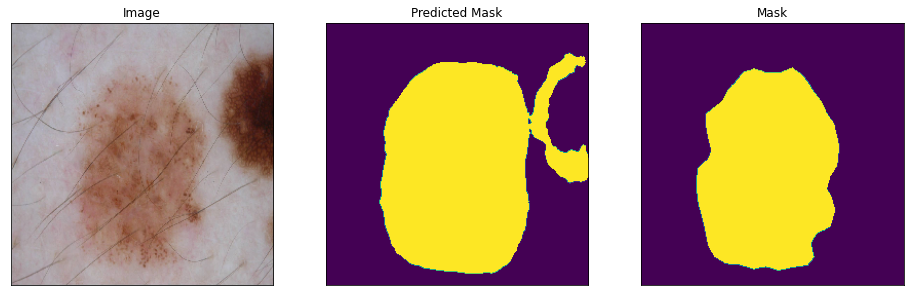

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


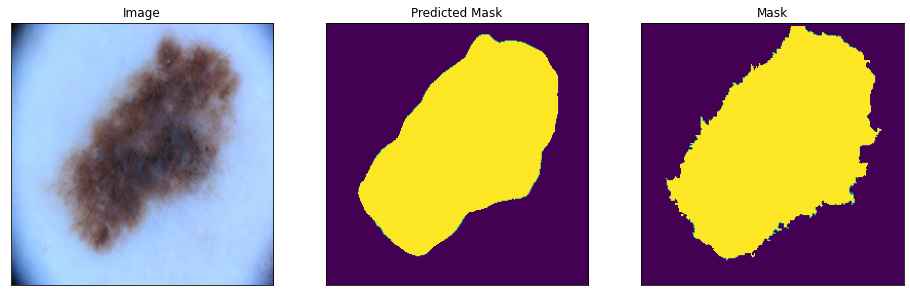

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


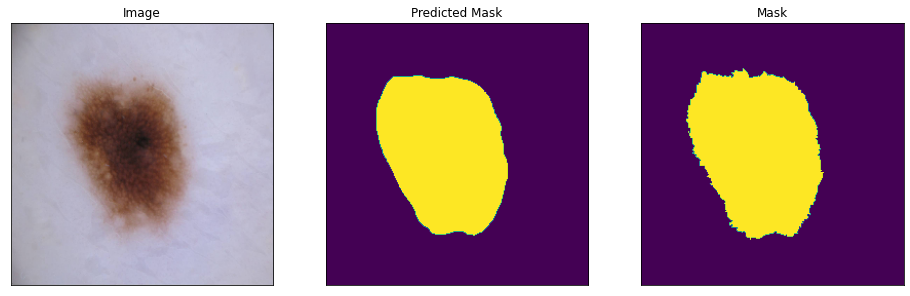

In [14]:
plot_images_masks(azure_model, validation_images, validation_masks)

#### Test Images (Unseen)

In [15]:
from constants import TEST_DIR

# train_images, _ = load_images(TEST_DIR, backbone='resnet34', load_masks=True, size=5)
train_images, test_masks = load_images(TEST_DIR, load_masks=True, resize_to=(256, 256), size=5)

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)


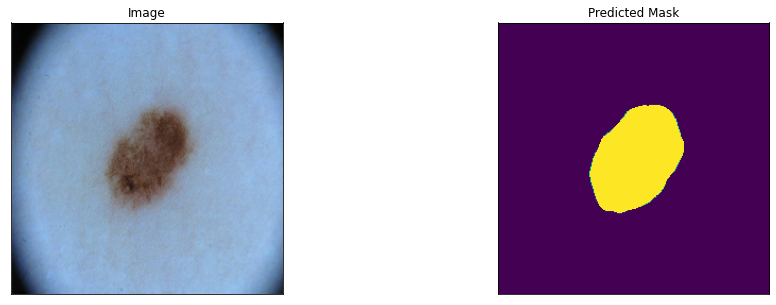

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)


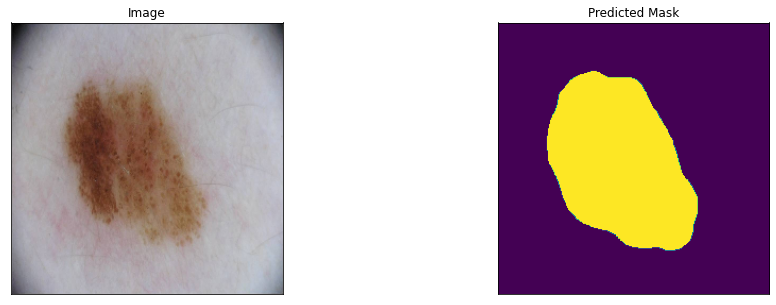

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)


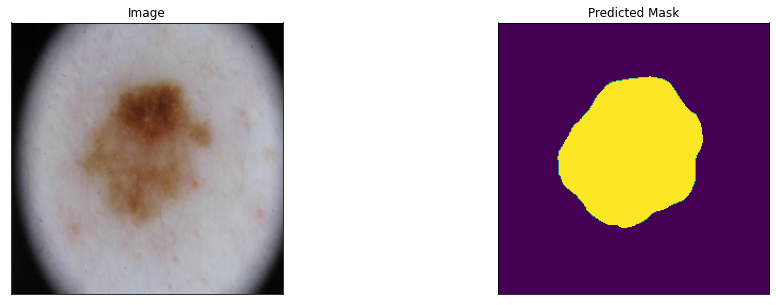

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)


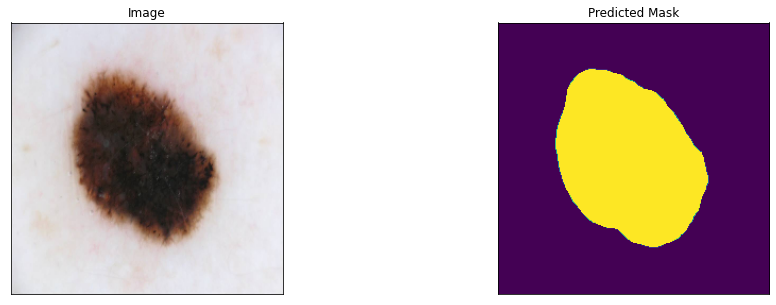

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)


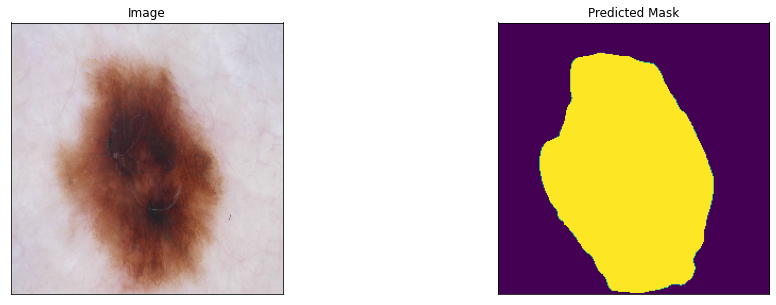

In [16]:
plot_images_masks(azure_model, train_images)

### Calculate Metrics

This metric calculation is based on the [umetrics library](https://github.com/quantumjot/unet_segmentation_metrics).

The calculation uses the jaccard index threshold from the dataset description [landing page](https://challenge2018.isic-archive.com/task1/), section `metrics`, which is `0.65`.

In [17]:
from constants import TEST_DIR

test_images, test_masks = load_images(TEST_DIR, load_masks=True, resize_to=(256, 256))

In [18]:
predicted_masks_list = []

for test_image in test_images:
    test_image = np.expand_dims(test_image, axis=0)
    predicted_mask = azure_model.predict(test_image).round().squeeze(axis=0)
    predicted_masks_list.append(predicted_mask)
    
predicted_masks = np.stack(predicted_masks_list)

assert predicted_masks.shape == (len(test_masks), 256, 256, 1)

In [19]:
%%time

from utils.metrics import Metrics

metrics = Metrics().calculate_batch(
    masks=test_masks,
    predicted_masks=predicted_masks
)

metrics

CPU times: user 1min 4s, sys: 689 ms, total: 1min 5s
Wall time: 1min 7s


{'n_images': 300,
 'n_true_positives': 4186738,
 'n_true_negatives': 14617148,
 'n_false_positives': 497914,
 'n_false_negatives': 359000,
 'iou_score': 0.8177475988678826,
 'threshold_jaccard_index': 0.7670306031500292,
 'jaccard_similarity_index': 0.8177475988678826,
 'dice': 0.8904746293158011,
 'f1_score': 0.44523731465790056,
 'sensitivity': 0.9301910309098971,
 'specificity': 0.9562447282428899,
 'accuracy': 0.9564151000976563}

In [20]:
%%time

from utils.metrics import Metrics

single_image_metrics = Metrics().calculate(
    mask=test_masks[0],
    predicted_mask=predicted_masks[0]
)

single_image_metrics

CPU times: user 213 ms, sys: 3.23 ms, total: 216 ms
Wall time: 216 ms


{'n_images': 1,
 'n_true_positives': 5775,
 'n_true_negatives': 59115,
 'n_false_positives': 644,
 'n_false_negatives': 2,
 'iou_score': 0.8993926179722784,
 'threshold_jaccard_index': 0.8993926179722784,
 'jaccard_similarity_index': 0.8993926179722784,
 'dice': 0.9470318137094129,
 'f1_score': 0.47351590685470646,
 'sensitivity': 0.9996537995499394,
 'specificity': 0.9892233805786577,
 'accuracy': 0.990142822265625}